Accuracy for k=1: 0.7619047619047619
Accuracy for k=5: 0.7619047619047619
Accuracy for k=9: 0.7619047619047619
Accuracy for k=15: 0.7619047619047619
Accuracy for k=18: 0.6190476190476191
Accuracy for k=25: 0.6190476190476191


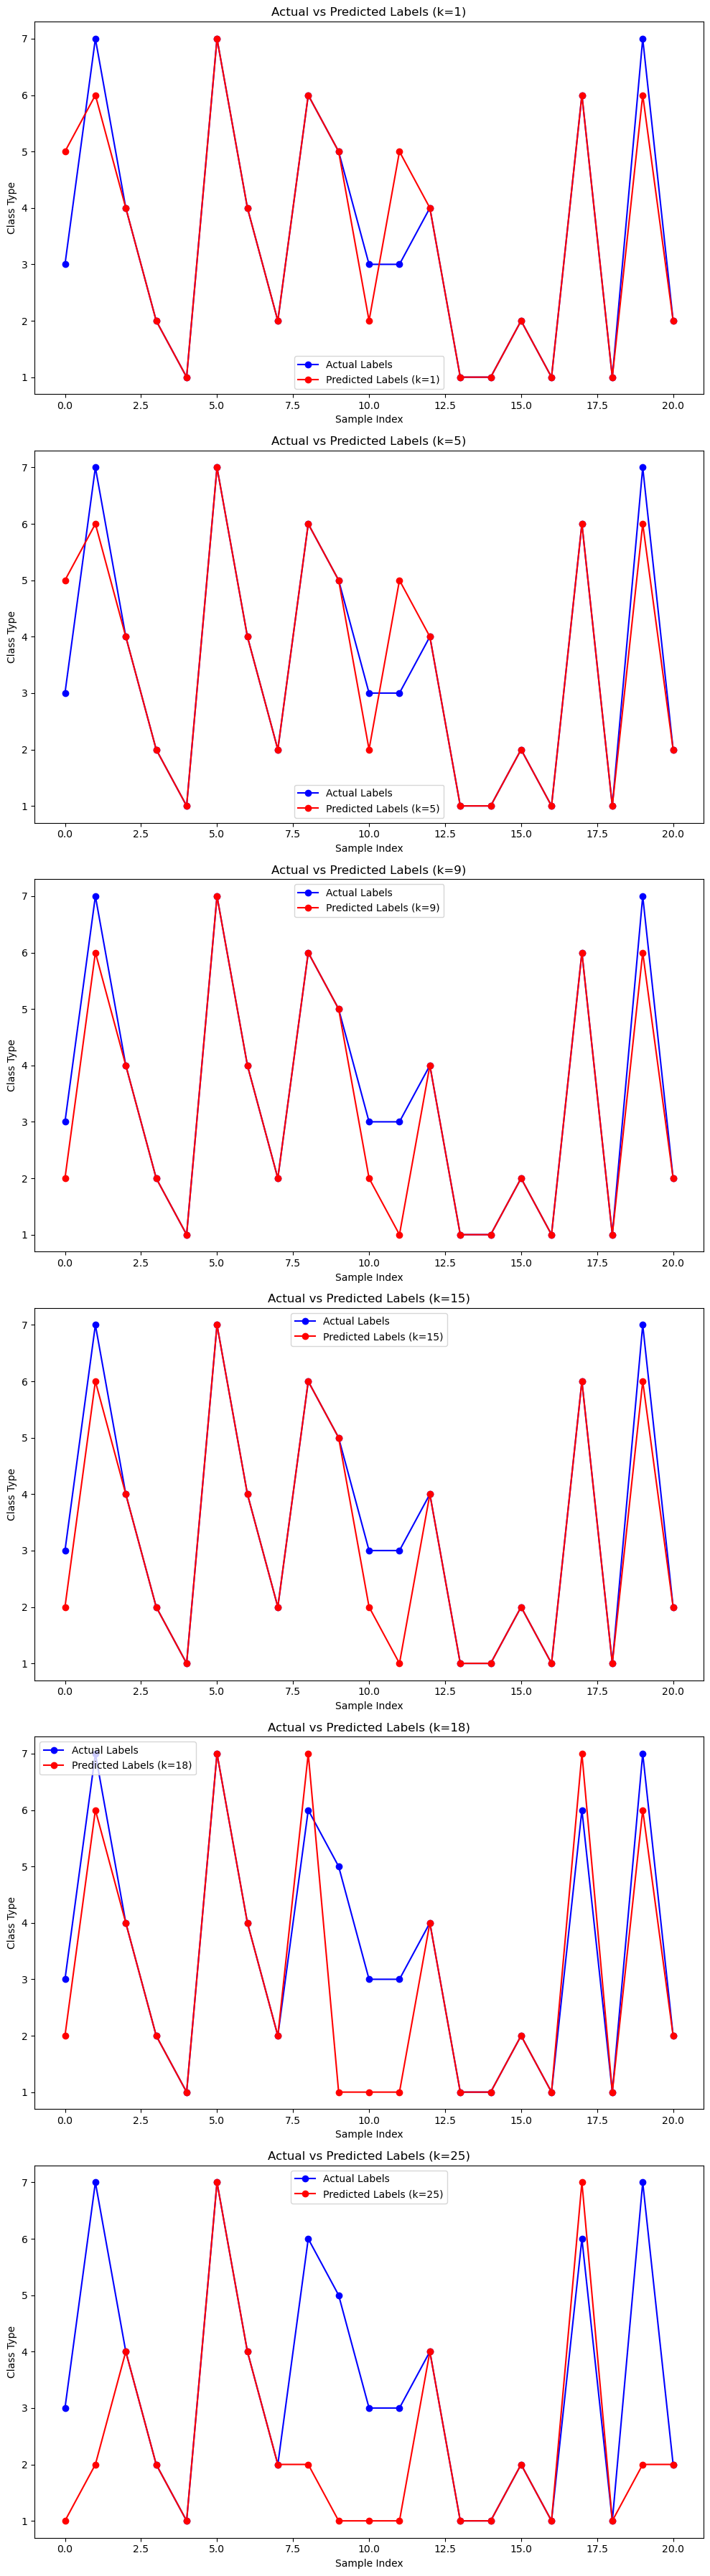

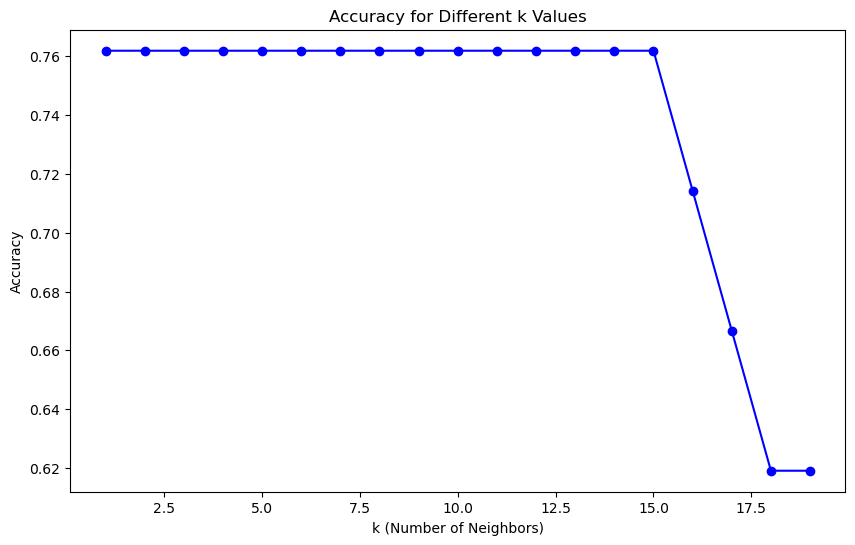

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
path = "zoo.csv"
df = pd.read_csv(path)

# Define features and target variable
features = [
    "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed",
    "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize"
]
X = df[features].values
y = df["class_type"].values

# Standardize the features (optional, but can be beneficial for KNN)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]




k_values = [1, 5, 9 , 15, 18, 25,]

# Create subplots
fig, axes = plt.subplots(nrows=len(k_values), ncols=1, figsize=(10, 6 * len(k_values)))

for i, k in enumerate(k_values):
    # Instantiate and train the KNN model
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = knn.predict(X_test)

    # Evaluate the model
    accuracy = np.mean(predictions == y_test)
    print(f"Accuracy for k={k}: {accuracy}")

    # Plot actual vs predicted labels
    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, marker='o', linestyle='-', color='blue', label='Actual Labels')
    ax.plot(range(len(predictions)), predictions, marker='o', linestyle='-', color='red', label=f'Predicted Labels (k={k})')
    ax.set_title(f'Actual vs Predicted Labels (k={k})')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Class Type')
    ax.legend()

plt.tight_layout()
plt.show()

# List of k values to try
k_values = range(1, 20)

# Create empty lists to store accuracy values
accuracies = []

# Evaluate the model for different k values
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    accuracies.append(accuracy)

# Plot the accuracy values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()
